# Fluctuaciones en procesos electorales chilenos por región

## Contexto

Debido a la desigualdad de cantidad de habitantes por región en Chile, existe la creencia popular de que en procesos electorales siempre va a triunfar aquello que triunfa en la Región Metropolitana. Sin embargo, en cada proceso electoral, cada una de las 16 regiones presentes en Chile presenta variaciones de población y también de tendencias de sector político. Surge entonces la interrogante de si históricamente, en los resultados de procesos electorales, ¿Sólo valen las variaciones de la región metropolitana para marcar la tendencia nacional?
Adicionalmente, ¿cada región es invariante en el tiempo en tendencia política?

El Servicio de Votaciones Electorales (SERVEL) disponibiliza datos abiertos de cada proceso electoral, incluyendo elecciones presidenciales, municipales y plebiscitos. Dados estos datos, se busca poder afirmar o desmentir esta información con la información presente de las 16 regiones del país

## Elecciones presidenciales

En el primer proceso electoral en que se suele pensar es en el presidencial, el cual se da cada 4 años desde 2006 a la fecha y es el que intuitivamente tiene una mayor participación. 

Se descargan los datos abiertos del SERVEL: https://www.servel.cl/servel/modulo-de-archivos/ para los procesos de elección presidencial entre 2006 y la actualidad y se estudia en detalle las variaciones de preferencias por sector político

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from matplotlib.patches import Circle
from matplotlib.colors import LinearSegmentedColormap
from shapely.ops import unary_union
from flexitext import flexitext
import plotly.graph_objects as go

Desde 2006 hasta 2017

In [7]:
data = pd.read_excel('resultados_elecciones_presidenciales_ce_1989_2017_Chile.xlsx',
                     sheet_name = 'Presidenciales Chile')
data.head(5)

,Tipo de Elección,Cargo,Fecha de Elección,Año de Elección,Inicio de Período,Fin de Período,Período,Votación Presidencial,Id Región,Región,...,Sexo Mesa,Candidato (a),Nombres,Apellido Paterno,Apellido Materno,Sexo,Electo(a),Partido,Sigla Partido,Votos Totales
0,PRESIDENCIAL,PRESIDENTE,1989-12-14,1989,1990,1994,1990 a 1994,UNICA VOTACIÓN,1,DE TARAPACA,...,HOMBRE,FRANCISCO JAVIER ERRAZURIZ,FRANCISCO JAVIER,ERRAZURIZ,TALAVERA,HOMBRE,NaN,INDEPENDIENTE,INDEP,7065
1,PRESIDENCIAL,PRESIDENTE,1989-12-14,1989,1990,1994,1990 a 1994,UNICA VOTACIÓN,1,DE TARAPACA,...,HOMBRE,HERNAN BUCHI,HERNAN,BUCHI,BUC,HOMBRE,NaN,INDEPENDIENTE,INDEP,11549
2,PRESIDENCIAL,PRESIDENTE,1989-12-14,1989,1990,1994,1990 a 1994,UNICA VOTACIÓN,1,DE TARAPACA,...,HOMBRE,PATRICIO AYLWIN,PATRICIO,AYLWIN,AZOCAR,HOMBRE,SI,DEMOCRATA CRISTIANO,DC,23230
3,PRESIDENCIAL,PRESIDENTE,1989-12-14,1989,1990,1994,1990 a 1994,UNICA VOTACIÓN,1,DE TARAPACA,...,HOMBRE,VOTOS NULOS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,561
4,PRESIDENCIAL,PRESIDENTE,1989-12-14,1989,1990,1994,1990 a 1994,UNICA VOTACIÓN,1,DE TARAPACA,...,HOMBRE,VOTOS EN BLANCO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,392


Ultimo proceso electoral presencial en 2021

In [9]:
data_2021 = pd.read_excel('Resultados_mesa_presidencial_TRICEL_2v_2021.xlsx', sheet_name = 'CHILE')
data_2021.head(5)

,Nro. Región,Región,Provincia,Circ. Senatorial,Distrito,Comuna,Circ. Electoral,Local,Nro. Mesa,Tipo de mesa,Mesas Fusionadas,Electores,Nro. en Voto,Candidato,Votos TRICEL
0,1.0,DE TARAPACA,IQUIQUE,2.0,2.0,ALTO HOSPICIO,ALTO HOSPICIO,ANEXO DE COLEGIO SAN ANTONIO DE MATILLA,20.0,M,20M,333.0,1.0,GABRIEL BORIC FONT,71.0
1,1.0,DE TARAPACA,IQUIQUE,2.0,2.0,ALTO HOSPICIO,ALTO HOSPICIO,ANEXO DE COLEGIO SAN ANTONIO DE MATILLA,20.0,M,20M,333.0,2.0,JOSE ANTONIO KAST RIST,92.0
2,1.0,DE TARAPACA,IQUIQUE,2.0,2.0,ALTO HOSPICIO,ALTO HOSPICIO,ANEXO DE COLEGIO SAN ANTONIO DE MATILLA,20.0,M,20M,333.0,900.0,VOTOS NULOS,1.0
3,1.0,DE TARAPACA,IQUIQUE,2.0,2.0,ALTO HOSPICIO,ALTO HOSPICIO,ANEXO DE COLEGIO SAN ANTONIO DE MATILLA,20.0,M,20M,333.0,901.0,VOTOS EN BLANCO,0.0
4,1.0,DE TARAPACA,IQUIQUE,2.0,2.0,ALTO HOSPICIO,ALTO HOSPICIO,ANEXO DE COLEGIO SAN ANTONIO DE MATILLA,21.0,M,21M,340.0,1.0,GABRIEL BORIC FONT,82.0


In [10]:
data = data[(data["Votación Presidencial"] == "SEGUNDA VOTACIÓN")
            & (data["Año de Elección"] >= 2006)]
data.reset_index(inplace=True, drop=True)
data.head(5)

,Tipo de Elección,Cargo,Fecha de Elección,Año de Elección,Inicio de Período,Fin de Período,Período,Votación Presidencial,Id Región,Región,...,Sexo Mesa,Candidato (a),Nombres,Apellido Paterno,Apellido Materno,Sexo,Electo(a),Partido,Sigla Partido,Votos Totales
0,PRESIDENCIAL,PRESIDENTE,2006-01-15,2006,2006,2010,2006 a 2010,SEGUNDA VOTACIÓN,1,DE TARAPACA,...,HOMBRE,MICHELLE BACHELET,MICHELLE,BACHELET,JERIA,MUJER,SI,SOCIALISTA DE CHILE,PS,3910
1,PRESIDENCIAL,PRESIDENTE,2006-01-15,2006,2006,2010,2006 a 2010,SEGUNDA VOTACIÓN,1,DE TARAPACA,...,HOMBRE,SEBASTIAN PIÑERA,SEBASTIAN,PIÑERA,ECHENIQUE,HOMBRE,NaN,RENOVACION NACIONAL,RN,3430
2,PRESIDENCIAL,PRESIDENTE,2006-01-15,2006,2006,2010,2006 a 2010,SEGUNDA VOTACIÓN,1,DE TARAPACA,...,HOMBRE,VOTOS NULOS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,195
3,PRESIDENCIAL,PRESIDENTE,2006-01-15,2006,2006,2010,2006 a 2010,SEGUNDA VOTACIÓN,1,DE TARAPACA,...,HOMBRE,VOTOS EN BLANCO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47
4,PRESIDENCIAL,PRESIDENTE,2006-01-15,2006,2006,2010,2006 a 2010,SEGUNDA VOTACIÓN,1,DE TARAPACA,...,MUJER,MICHELLE BACHELET,MICHELLE,BACHELET,JERIA,MUJER,SI,SOCIALISTA DE CHILE,PS,3170


Se agrupa por sector político: izquierda o derecha

In [11]:
data_agg_2021 = data_2021.groupby(["Nro. Región", "Región"]).apply((lambda s: pd.Series({
   "Votos izquierda": s[s["Candidato"].isin(['GABRIEL BORIC FONT'])]["Votos TRICEL"].astype(int).sum(),
   "Votos derecha": s[s["Candidato"].isin(['JOSE ANTONIO KAST RIST'])]["Votos TRICEL"].astype(int).sum()
}))
)
data_agg_2021.reset_index(inplace = True)
data_agg_2021["% izquierda"] = round(
    data_agg_2021["Votos izquierda"] / (data_agg_2021["Votos izquierda"] + data_agg_2021["Votos derecha"]), 2)
data_agg_2021["% derecha"] = round(
    data_agg_2021["Votos derecha"] / (data_agg_2021["Votos izquierda"] + data_agg_2021["Votos derecha"]), 2)
data_agg_2021["Participación efectiva"] = data_agg_2021["Votos izquierda"] + data_agg_2021["Votos derecha"]
data_agg_2021.rename(columns = {"Nro. Región": "Id Región"}, inplace = True)
data_agg_2021["Id Región"] = data_agg_2021["Id Región"].astype(int)
data_agg_2021.insert(0, 'Año de Elección', 2021)
data_agg_2021.head(5)

C:\Users\Diego\AppData\Local\Temp\ipykernel_4580\2741349133.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data_agg_2021 = data_2021.groupby(["Nro. Región", "Región"]).apply((lambda s: pd.Series({


,Año de Elección,Id Región,Región,Votos izquierda,Votos derecha,% izquierda,% derecha,Participación efectiva
0,2021,1,DE TARAPACA,55477,58485,0.49,0.51,113962
1,2021,2,DE ANTOFAGASTA,128009,86097,0.60,0.40,214106
2,2021,3,DE ATACAMA,76194,40235,0.65,0.35,116429
3,2021,4,DE COQUIMBO,199259,115610,0.63,0.37,314869
4,2021,5,DE VALPARAISO,544874,374058,0.59,0.41,918932


In [12]:
izq_lista = ["EDUARDO FREI", 'MICHELLE BACHELET JERIA', 'MICHELLE BACHELET',
            'ALEJANDRO  GUILLIER ALVAREZ']
der_lista = ['SEBASTIAN PIÑERA', 'SEBASTIAN PIÑERA ECHENIQUE', 'EVELYN MATTHEI FORNET']

data_agg = data.groupby(["Año de Elección", "Id Región", "Región"]).apply((lambda s: pd.Series({
   "Votos izquierda": s[s["Candidato (a)"].isin(izq_lista)]["Votos Totales"].astype(int).sum(),
   "Votos derecha": s[s["Candidato (a)"].isin(der_lista)]["Votos Totales"].astype(int).sum()
}))
)
data_agg.reset_index(inplace = True)
data_agg["% izquierda"] = round(
    data_agg["Votos izquierda"] / (data_agg["Votos izquierda"] + data_agg["Votos derecha"]), 2)
data_agg["% derecha"] = round(
    data_agg["Votos derecha"] / (data_agg["Votos izquierda"] + data_agg["Votos derecha"]), 2)
data_agg["Participación efectiva"] = data_agg["Votos izquierda"] + data_agg["Votos derecha"]
data_agg = pd.concat((data_agg, data_agg_2021))
data_agg.head(5)

C:\Users\Diego\AppData\Local\Temp\ipykernel_4580\1558685333.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data_agg = data.groupby(["Año de Elección", "Id Región", "Región"]).apply((lambda s: pd.Series({


,Año de Elección,Id Región,Región,Votos izquierda,Votos derecha,% izquierda,% derecha,Participación efectiva
0,2006,1,DE TARAPACA,86120,84901,0.50,0.50,171021
1,2006,2,DE ANTOFAGASTA,115979,73399,0.61,0.39,189378
2,2006,3,DE ATACAMA,66055,43878,0.60,0.40,109933
3,2006,4,DE COQUIMBO,158908,108237,0.59,0.41,267145
4,2006,5,DE VALPARAISO,389696,384079,0.50,0.50,773775


### Participación electoral

Intuitivamente, se puede creer que debido al aumento constante de población en el país (particularmente en la región Metropolitana), existe un aumento de participación en las votaciones. Sin embargo, el gráfico muestra que para la Región Metropolitana esto no es cierto, donde en 2013 se registra una partipación electoral más baja que en los procesos anteriores. En 2021 se alcanza un peak de participación en los últimos procesos desde 2006

Text(0.5, 1.0, 'La participación en la RM fluctúa no necesariamente de forma monótona')

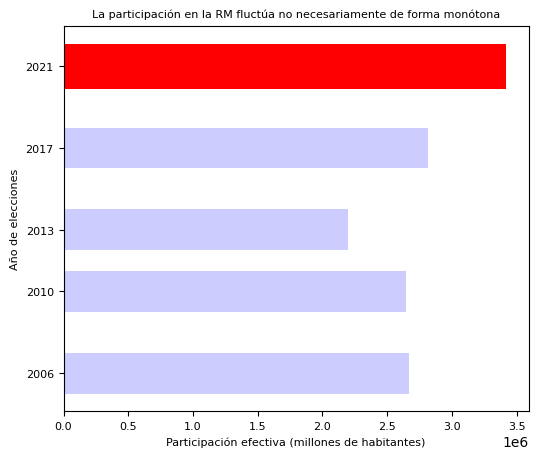

In [13]:
fig, ax = plt.subplots(1, 1, figsize = (6, 5))

data_met = data_agg[data_agg["Id Región"] == 13].copy()

for temp_iter in data_met.groupby(["Año de Elección"]):
    temp_df = temp_iter[1]
    anio = temp_iter[0][0]
    if anio == 2021:
        ax.barh(temp_df["Año de Elección"], temp_df["Participación efectiva"], height = 2.2, color = 'r')
    else:
        ax.barh(temp_df["Año de Elección"], temp_df["Participación efectiva"],
                height = 2, color = 'b', alpha = 0.2)

ax.set_yticks(data_met["Año de Elección"].values)
ax.set_yticklabels(data_met["Año de Elección"].astype(str))
ax.tick_params(axis='both', labelsize=8)
ax.set_xlabel("Participación efectiva (millones de habitantes)", fontsize = 8)
ax.set_ylabel("Año de elecciones", fontsize = 8)
ax.set_title("La participación en la RM fluctúa no necesariamente de forma monótona", fontsize = 8)

El gráfico mostrado arriba **desmiente totalmente cualquier tendencia monótona creciente o decreciente en la participación electoral en la región metropolitana en los últimos años**

### Resultados por tendencia política en las regiones de Chile

Sabiendo los porcentajes de preferencias por región. Se puede saber en cada proceso por separado, si los resultados de **todas las regiones** tuvieron una tendencia hacia derecha, centro o izquierda política, donde también existe la posibilidad que solo la Región Metropolitana (y otras regiones de la mayor cantidad de participación) exhiba una tendencia hacia el sector ganador

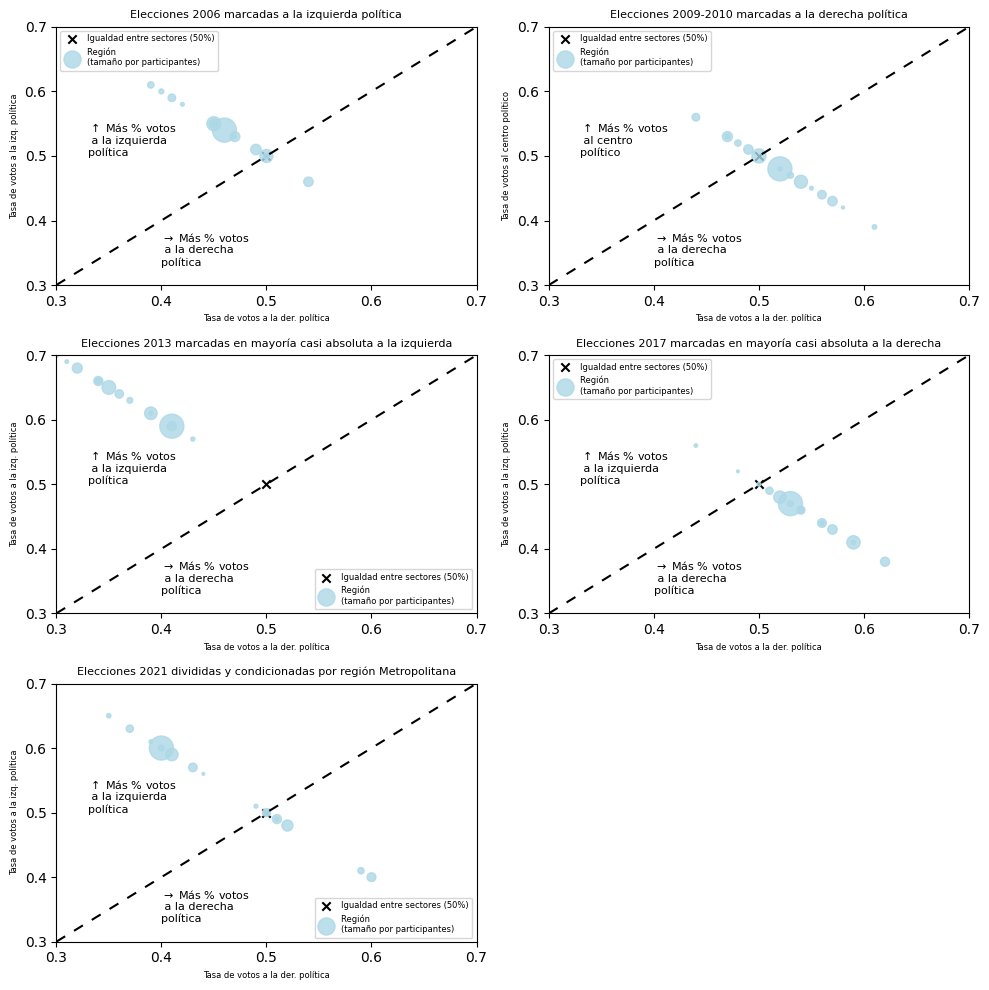

In [16]:
fig, ax = plt.subplots(3, 2, figsize=(10, 10))
custom_linestyle = (0, (5, 5))  # 5 unidades de línea, 5 unidades de espacio

for (idx, temp_iter) in enumerate(data_agg.groupby(["Año de Elección"])):
    temp_df = temp_iter[1]
    anio = temp_iter[0][0]
    region = temp_df["Id Región"].unique()[0]
    
    ax[idx // 2, idx % 2].plot(np.arange(0.3, 0.8, 0.1),
        np.arange(0.3, 0.8, 0.1),
        color = 'k',
        linestyle=custom_linestyle)
    ax[idx // 2, idx % 2].scatter(0.5, 0.5, marker = 'x', color = "k", label = "Igualdad entre sectores (50%)")

    ax[idx // 2, idx % 2].scatter(temp_df["% derecha"], temp_df["% izquierda"],
            s=temp_df['Participación efectiva']/temp_df['Participación efectiva'].max()*300,
            c="lightblue", alpha = 0.8, label = "Región \n(tamaño por participantes)")
    ax[idx // 2, idx % 2].set_xlim(0.3, 0.7)
    ax[idx // 2, idx % 2].set_ylim(0.3, 0.7)
    ax[idx // 2, idx % 2].set_xticks(np.arange(0.3, 0.8, 0.1))
    ax[idx // 2, idx % 2].set_yticks(np.arange(0.3, 0.8, 0.1))
    ax[idx // 2, idx % 2].set_xlabel('Tasa de votos a la der. política', fontsize=6)
    ax[idx // 2, idx % 2].set_ylabel('Tasa de votos a la izq. política', fontsize=6)
    
    if anio == 2010:
        ax[idx // 2, idx % 2].text(0.33, 0.5, r'$\uparrow$ Más % votos'+
                                '\n al centro\npolítico', fontsize=8)
        ax[idx // 2, idx % 2].set_ylabel('Tasa de votos al centro político', fontsize=6)
    else:
        ax[idx // 2, idx % 2].text(0.33, 0.5, r'$\uparrow$ Más % votos'+
                                '\n a la izquierda\npolítica', fontsize=8)
    ax[idx // 2, idx % 2].text(0.4, 0.33, r'$\rightarrow$ Más % votos'+
                            '\n a la derecha\npolítica', fontsize=8)
    ax[idx // 2, idx % 2].add_patch(Circle((-0.5, 7), 0.03, color='none', ec='grey'))
    ax[idx // 2, idx % 2].legend(fontsize = 6)

ax[0, 0].set_title("Elecciones 2006 marcadas a la izquierda política", fontsize = 8)
ax[0, 1].set_title("Elecciones 2009-2010 marcadas a la derecha política", fontsize = 8)
ax[1, 0].set_title("Elecciones 2013 marcadas en mayoría casi absoluta a la izquierda", fontsize = 8)
ax[1, 1].set_title("Elecciones 2017 marcadas en mayoría casi absoluta a la derecha", fontsize = 8)
ax[2, 0].set_title("Elecciones 2021 divididas y condicionadas por región Metropolitana", fontsize = 8)
ax[2, 1].set_axis_off() #ocultar ejes originales
fig.tight_layout()

En los gráficos mostrados arriba, se puede ver que en general, en todos los procesos electorales cuando un sector (derecha o izquierda) triunfa, en realidad suele triunfar en todas las regiones. Se puede observar que:

- En el proceso de 2013 todas las regiones sin excepción tuvieron inclinación por el sector de izquierda política (todos los puntos que representan regiones en el triángulo superior), donde la RM fue incluso una de las que mostró más similitud entre ambos sectores. Esto desmiente totalmente que en 2013 la decisión de la RM fue la más determinante, ya que se observa que tiende a ser la más dividida.
- En el proceso de 2017, se puede observar una inversión en la tendencia hacia el sector de derecha política (triángulo inferior), donde nuevamente la RM fue una de las que mostró más similitud entre ambos sectores.
- El único proceso que puede dar cuenta una gran influencia de la RM fue el de 2021, donde esta región tiende a ser la con mayor inclinación hacia el sector de izquierda.

Como ya se vio la tendencia general de las regiones, ahora se exploran tendencias por ubicación demográfica. Para lo anterior, se definen los siguientes mapas de colores

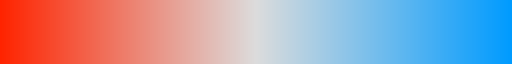

In [17]:
gradient_iz_der = LinearSegmentedColormap.from_list('my_gradient', (
    # Edit this gradient at https://eltos.github.io/gradient/#FF2400-DCDCDC-009BFF
    (0.000, (1.000, 0.141, 0.000)),
    (0.500, (0.863, 0.863, 0.863)),
    (1.000, (0.000, 0.608, 1.000))))
gradient_iz_der



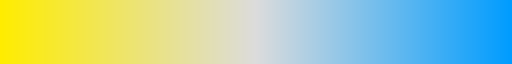

In [18]:
gradient_cen_der = LinearSegmentedColormap.from_list('my_gradient', (
    # Edit this gradient at https://eltos.github.io/gradient/#FFED00-DCDCDC-009CFF
    (0.000, (1.000, 0.929, 0.000)),
    (0.500, (0.863, 0.863, 0.863)),
    (1.000, (0.000, 0.612, 1.000))))
gradient_cen_der

Bordes de regiones

In [20]:

def set_border_on_regiones(df, regiones_list, color, ax, alpha=0.5, linewidth=1.5):
    df_temp = df[df['Id Región'].isin(regiones_list)]
    contorno = unary_union(df_temp.geometry)
    contorno_gdf = gpd.GeoDataFrame(geometry=[contorno], crs=df_temp.crs)
    ax = contorno_gdf.boundary.plot(ax=ax, color=color, alpha=alpha, linewidth=linewidth)
    return ax

Usando los mapas de color anteriores. Se grafican las tendencias de sector político en el mapa de Chile:

C:\Users\Diego\AppData\Local\Temp\ipykernel_4580\2124392646.py:27: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['Id Región']):
C:\Users\Diego\AppData\Local\Temp\ipykernel_4580\2124392646.py:27: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['Id Región']):
C:\Users\Diego\AppData\Local\Temp\ipykernel_4580\2124392646.py:27: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(gdf.geometry.centroid.x, gdf.ge

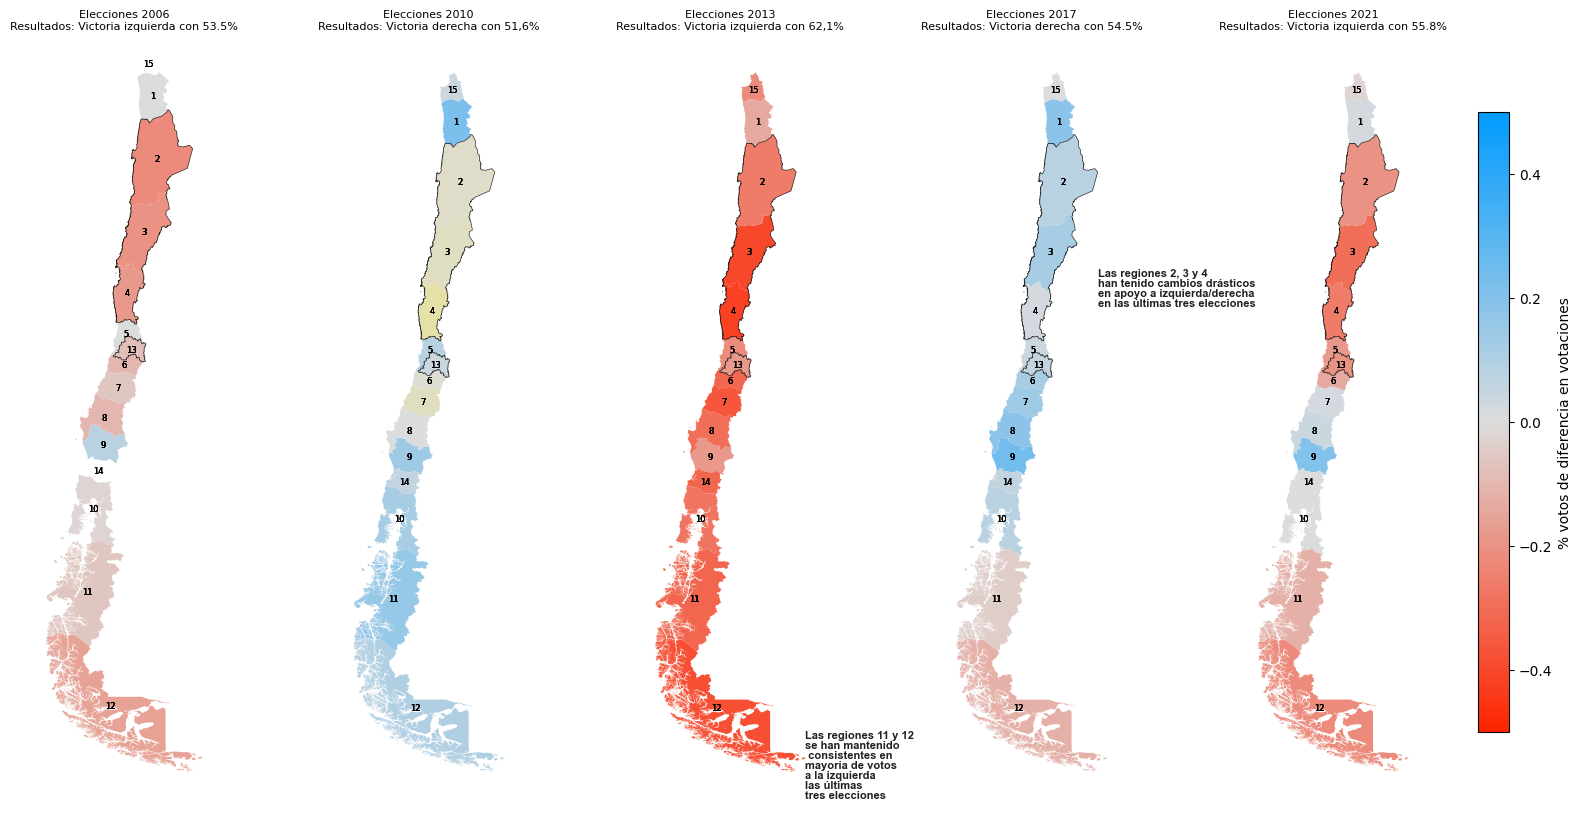

In [28]:
# TODO: Agregar las regiones que no existen en el 2006
gdf = gpd.read_file("regiones/regiones.shp")
gdf['Id Región'] = gdf["COD_REGI"].astype(int)

gdf = gdf.merge(data_agg, on = 'Id Región')

fig, ax = plt.subplots(1, 5, figsize=(20, 10))
for (idx, temp_iter) in enumerate(gdf.groupby(["Año de Elección"])):
    temp_df = temp_iter[1]
    anio = temp_iter[0][0]
    temp_df['% diferencia'] = temp_df['% derecha'] - temp_df['% izquierda']
    # temp_df['% diferencia'] = temp_df['% izquierda'] - temp_df['% derecha']
    cmap = gradient_iz_der
    if idx == 1:
        cmap = gradient_cen_der
        # agregar nuevo registro
        # temp_df.concat({'Año de Elección': 2006, 'Id Región': 15, 'Región': 'Arica y Parinacota'})
        # temp_df.append({'Año de Elección': 2006, 'Id Región': 14, 'Región': 'Los Ríos'})
        # temp_df.loc[temp_df['Id Región'] == 15, '% diferencia'] = temp_df.loc[temp_df['Id Región'] == 1, '% diferencia'].values[0]
        # temp_df.loc[temp_df['Id Región'] == 14, '% diferencia'] = temp_df.loc[temp_df['Id Región'] == 10, '% diferencia'].values[0]
    temp_df.plot(column='% diferencia', ax=ax[idx], legend=False,
                    legend_kwds={'label': "% diferencia",
                                'orientation': "horizontal"},
                    cmap=cmap, vmin=-0.5, vmax=0.5)
   
    # set Id Región en el centro de cada región
    for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['Id Región']):
        ax[idx].text(x, y, label, fontsize=6, ha='center', va='center')
    ax[idx].set_axis_off() #ocultar ejes originales
    set_border_on_regiones(gdf, [13], 'black', alpha=0.8, linewidth=0.5, ax=ax[idx])
    set_border_on_regiones(gdf, [2, 3, 4], 'black', alpha=0.8, linewidth=0.5, ax=ax[idx])
    # set_border_on_regiones(gdf, [11, 12], 'black', alpha=0.8, linewidth=0.5, ax=ax[idx])
# Agregar el colorbar de forma manual
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=-0.5, vmax=0.5))
sm.set_array([])  # Esto es para evitar un warning
cbar = fig.colorbar(sm, ax=ax, orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('% votos de diferencia en votaciones')  # Etiqueta para el colorbar

ax[0].set_title("Elecciones 2006\nResultados: Victoria izquierda con 53.5%", fontsize = 8)
ax[1].set_title("Elecciones 2010\nResultados: Victoria derecha con 51,6%", fontsize = 8)
ax[2].set_title("Elecciones 2013\nResultados: Victoria izquierda con 62,1%", fontsize = 8)
ax[3].set_title("Elecciones 2017\nResultados: Victoria derecha con 54.5%", fontsize = 8)
ax[4].set_title("Elecciones 2021\nResultados: Victoria izquierda con 55.8%", fontsize = 8)

text = "<name:Arial, size:8, color:#231f20, weight:bold>Las regiones 11 y 12\nse han mantenido\n consistentes en\nmayoría de votos\na la izquierda\nlas últimas\ntres elecciones</>"
flexitext(0.95, 0.1, text, va="top", ax=ax[2], ha='left', ma='left')

text = "<name:Arial, size:8, color:#231f20, weight:bold>Las regiones 2, 3 y 4\nhan tenido cambios drásticos\nen apoyo a izquierda/derecha\nen las últimas tres elecciones</>"
flexitext(0.9, 0.7, text, va="top", ax=ax[3], ha='left', ma='left')


Se puede ver que en varios procesos electorales presidenciales el país completo puede llegar a apoyar a un sector político en particular. En el 2013 todo el país de norte a sur tuvo una inclinación hacia la izquierda, mientras que en 2017 la relación se invirtió (exceptuando las 2 últimas regiones en el sur de Chile), observando una **transición de sector político**. En el resto de procesos se observa una división, la cual tiende a estar marcada demográficamente. Ejemplo de esto último es que prácticamente todo el norte de Chile apoyó a la izquierda en 2021, mientras que el sur tiende a estar polarizado o dividido. Similarmente, en el 2010 una zona muy marcada en la 2da, 3a y 4a región tuvo una preferencia por el centro político

### Transiciones de sector político entre procesos electorales presidenciales

#### Transiciones en el tiempo
Anteriormente, se ha visto las tendencias por proceso electoral. Sin embargo, se ha omitido cómo varían entre procesos. Para lo anterior, primero se grafican los porcentajes de apoyo y su evolución en el tiempo:

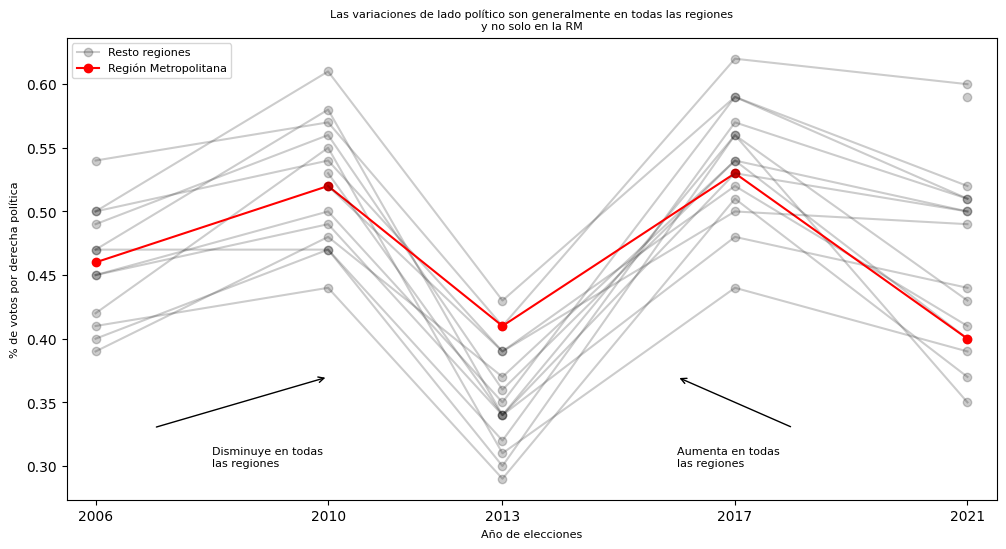

In [29]:
fig, ax = plt.subplots(1, 1, figsize = (12, 6))
flag_regiones = True
for temp_iter in data_agg.groupby(["Id Región"]):
  temp_df = temp_iter[1]
  region = temp_iter[0][0]

  if region == 13:
    ax.plot(temp_df["Año de Elección"], temp_df["% derecha"], alpha = 1, color = 'r', marker = 'o', label = 'Región Metropolitana')

  else:
    if flag_regiones:
      label = "Resto regiones"
      flag_regiones = False
    else:
      label = '_nolegend_'
    ax.plot(temp_df["Año de Elección"], temp_df["% derecha"], alpha = 0.2, color = 'k', marker = 'o', label = label)

  ax.set_xticks([2006, 2010, 2013, 2017, 2021])
  ax.set_xticklabels(["2006", "2010", "2013", "2017", "2021"])
  ax.set_xlim(2005.5, 2021.5)
  ax.set_xlabel("Año de elecciones", fontsize = 8)
  ax.set_ylabel("% de votos por derecha política", fontsize = 8)
ax.set_title("Las variaciones de lado político son generalmente en todas las regiones\ny no solo en la RM",
             fontsize = 8)
ax.annotate('', xy=(2010, 0.37), xytext=(2007, 0.33),
            arrowprops=dict(arrowstyle='->', lw=1, color='black'))
ax.annotate('', xy=(2016, 0.37), xytext=(2018, 0.33),
            arrowprops=dict(arrowstyle='->', lw=1, color='black'))
ax.text(2008, 0.3, 'Disminuye en todas\nlas regiones', fontsize=8)
ax.text(2016, 0.3, 'Aumenta en todas\nlas regiones', fontsize=8)
ax.legend(fontsize = 8)

Si se observan los procesos juntos, se puede observar que en general a través de los años existe una transición intercalada de sector político en las preferencias. Al ocurrir una transición de izquierda a derecha o viceversa, en general **el cambio de preferencia es en todas las regiones**. Esto muestra una evidencia que las transiciones en el ganador resultante de cada proceso es un **comportamiento país** y no determinado únicamente por la Región Metropolitana

#### Flujos de votos entre sectores

Agregando nulos y blancos

In [264]:
data_San_2021 = data_2021.groupby(["Nro. Región", "Región"]).apply(lambda s: pd.Series({
    "Votos izquierda": s[s["Candidato"] == 'GABRIEL BORIC FONT']["Votos TRICEL"].fillna(0).astype(int).sum(),
    "Votos derecha": s[s["Candidato"] == 'JOSE ANTONIO KAST RIST']["Votos TRICEL"].fillna(0).astype(int).sum(),
    "Votos Nulos": s[s["Candidato"] == 'VOTOS NULOS']["Votos TRICEL"].fillna(0).astype(int).sum(),
    "Votos en Blanco": s[s["Candidato"] == 'VOTOS EN BLANCO']["Votos TRICEL"].fillna(0).astype(int).sum()
}))

# Resetting the index
data_San_2021.reset_index(inplace=True)

# Calculating effective participation
#data_Sand_2021["Participación efectiva"] = data_Sand_2021["Votos izquierda"] + data_Sand_2021["Votos derecha"]+ data_Sand_2021["Votos en Blanco"]+ data_Sand_2021["Votos Nulos"]
data_San_2021["Participación efectiva"] = data_San_2021["Votos izquierda"] + data_San_2021["Votos derecha"]
data_San_2021.rename(columns={"Nro. Región": "Id Región"}, inplace=True)
data_San_2021["Id Región"] = data_San_2021["Id Región"].astype(int)

# Inserting election year at the beginning
data_San_2021.insert(0, 'Año de Elección', 2021)

izq_lista = ["EDUARDO FREI", 'MICHELLE BACHELET JERIA', 'MICHELLE BACHELET',
            'ALEJANDRO  GUILLIER ALVAREZ']
der_lista = ['SEBASTIAN PIÑERA', 'SEBASTIAN PIÑERA ECHENIQUE', 'EVELYN MATTHEI FORNET']

data['Candidato (a)']=data['Candidato (a)'].replace('VOTOS EN BLANCO ', 'VOTOS EN BLANCO')
data['Candidato (a)']=data['Candidato (a)'].replace('VOTOS NULOS ', 'VOTOS NULOS')

data_San = data.groupby(["Año de Elección", "Id Región", "Región"]).apply((lambda s: pd.Series({
   "Votos izquierda": s[s["Candidato (a)"].isin(izq_lista)]["Votos Totales"].astype(int).sum(),
   "Votos derecha": s[s["Candidato (a)"].isin(der_lista)]["Votos Totales"].astype(int).sum(),
    "Votos Nulos": s[s["Candidato (a)"] == 'VOTOS NULOS']["Votos Totales"].fillna(0).astype(int).sum(),
    "Votos en Blanco": s[s["Candidato (a)"] == 'VOTOS NULOS']["Votos Totales"].fillna(0).astype(int).sum()
}))
)
data_San.reset_index(inplace = True)

#data_Sand["Participación efectiva"] = data_Sand["Votos izquierda"] + data_Sand["Votos derecha"]+ data_Sand["Votos en Blanco"]+ data_Sand["Votos Nulos"]
data_San["Participación efectiva"] = data_San["Votos izquierda"] + data_San["Votos derecha"]
data_San_agg = pd.concat((data_San, data_San_2021))



df_san=data_San_agg[['Año de Elección','Votos izquierda','Votos derecha','Votos Nulos','Votos en Blanco','Participación efectiva']].groupby(['Año de Elección']).sum().reset_index()
df_san['Nulos y Blancos']=(df_san['Votos Nulos']+df_san['Votos en Blanco'])
df_san['%Nulos y Blancos']=(df_san['Nulos y Blancos']/df_san['Participación efectiva'])*100
df_san['% Izquierda'] = (df_san['Votos izquierda'] / df_san['Participación efectiva']) * 100
df_san['% Derecha'] = (df_san['Votos derecha'] / df_san['Participación efectiva']) * 100
df_san.drop(columns=['Votos Nulos','Votos en Blanco'],inplace=True)
df_san.set_index('Año de Elección', inplace=True)
df_san

C:\Users\CL160369868\AppData\Local\Temp\ipykernel_12424\3304849650.py:1: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\CL160369868\AppData\Local\Temp\ipykernel_12424\3304849650.py:27: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



,Votos izquierda,Votos derecha,Participación efectiva,Nulos y Blancos,%Nulos y Blancos,% Izquierda,% Derecha
Año de Elección,,,,,,,
2006,3723019,3236394,6959413,309944,4.453594,53.496164,46.503836
2010,3367790,3591182,6958972,378980,5.445919,48.394935,51.605065
2013,3470379,2111891,5582270,165832,2.970691,62.167882,37.832118
2017,3147868,3788641,6936509,112508,1.621969,45.381156,54.618844
2021,4596579,3640606,8237185,92147,1.118671,55.802789,44.197211


In [265]:
df_padron=pd.read_csv('people_enabled_to_vote_chile_2006_2021.csv')
df_padron.head()
resultado=pd.merge(df_padron,df_sand,left_on='Year',right_on='Año de Elección',how='left')
resultado['Participación']=resultado['Participación efectiva']+resultado['Nulos y Blancos']
resultado=resultado[['Year','Padron','Participación']]
resultado['No_participación']=resultado['Padron']-resultado['Participación']
#resultado['Nuevos'] = 0
#for i in range(1, len(resultado)):
#    resultado.loc[i, 'Nuevos'] = resultado.loc[i, 'Padron'] - resultado.loc[i - 1, 'Padron']

resultado['%Participación']=resultado['Participación']/resultado['Padron']*100
resultado['%No_participación']=resultado['No_participación']/resultado['Padron']*100


# for i in range(len(resultado) - 1):
#     resultado.loc[i, 'Nuevos'] = resultado.loc[i + 1, 'Nuevos']

# # Asignar el último valor como 0
# resultado.loc[len(resultado) - 1, 'Nuevos'] = 0
# Crear nuevas columnas 'Nuevos1', 'Nuevos2', ..., 'NuevosN' donde cada columna solo tiene un valor en su índice correspondiente
#for i in range(len(resultado)):
#    col_name = f'Nuevos{i+1}'
#    resultado[col_name] = [resultado['Nuevos'][i] if j == i else 0 for j in range(len(resultado))]
#resultado.drop('Nuevos', axis=1, inplace=True)
resultado


,Year,Padron,Participación,No_participación,%Participación,%No_participación
0,2006,8220897,7269357,951540,88.425351,11.574649
1,2010,8285186,7337952,947234,88.567137,11.432863
2,2013,13573143,5748102,7825041,42.349086,57.650914
3,2017,14308151,7049017,7259134,49.265744,50.734256
4,2021,15030974,8329332,6701642,55.414453,44.585547


Con el fin de visualizar los flujos de votos entre sectores, se parte primero por graficar los flujos de participación:

In [310]:
# Definir tendencias de análisis: solo Participación y No_participación
tendencias = ['Participación', 'No_participación']

# Función para calcular la transición entre dos años consecutivos
def calcular_transicion(df, año_anterior, año_actual):
    valores_anterior = df.loc[df['Year'] == año_anterior, tendencias].iloc[0]
    valores_actual = df.loc[df['Year'] == año_actual, tendencias].iloc[0]
    cambios = valores_actual - valores_anterior

    ganadores = cambios[cambios > 0]
    perdedores = cambios[cambios < 0] * -1

    total_ganancias = ganadores.sum()
    total_perdidas = perdedores.sum()

    # Crear matriz de transición vacía
    transicion = pd.DataFrame(0.0, index=tendencias, columns=tendencias)
    
    # Calcular transiciones de Participación y No_participación entre años
    if total_ganancias > 0 and total_perdidas > 0:
        for perdedor in perdedores.index:
            for ganador in ganadores.index:
                transicion.loc[perdedor, ganador] = perdedores[perdedor] * (ganadores[ganador] / total_ganancias)
    elif total_perdidas > 0:
        for perdedor in perdedores.index:
            transicion.loc[perdedor, 'No_participación'] += perdedores[perdedor]
    
    # Mantener o transferir valores de Participación y No_participación
    for tendencia in tendencias:
        if cambios[tendencia] >= 0:
            transicion.loc[tendencia, tendencia] += min(valores_anterior[tendencia], valores_actual[tendencia])
        else:
            transicion.loc[tendencia, tendencia] += valores_actual[tendencia]

    return transicion

# Generar diccionario de transiciones para cada par de años consecutivos
transiciones = {}
for i in range(1, len(resultado)):
    año_anterior = resultado['Year'].iloc[i - 1]
    año_actual = resultado['Year'].iloc[i]
    transiciones[f"{año_anterior}_to_{año_actual}"] = calcular_transicion(resultado, año_anterior, año_actual)

# Preparar listas para los datos del gráfico Sankey
source_labels_list = []
target_labels_list = []
values_list = []

# Iterar sobre cada matriz de transición en el diccionario `transiciones`
for key, transicion in transiciones.items():
    año_anterior, año_actual = key.split("_to_")
    
    for i, tendencia_origen in enumerate(tendencias):
        for j, tendencia_destino in enumerate(tendencias):
            source_label = f"{año_anterior}-{tendencia_origen}"
            target_label = f"{año_actual}-{tendencia_destino}"
            
            value = transicion.iloc[i, j]

            if value > 0:
                source_labels_list.append(source_label)
                target_labels_list.append(target_label)
                values_list.append(value)

# Crear lista de etiquetas únicas y mapear a índices
labels = list(set(source_labels_list + target_labels_list))
label_to_index = {label: idx for idx, label in enumerate(labels)}

source_indices = [label_to_index[label] for label in source_labels_list]
target_indices = [label_to_index[label] for label in target_labels_list]

labels_with_percentages = []
for label in labels:
    año, categoria = label.split('-')
    año = int(año)
    
    # Buscar el valor adecuado según la categoría del nodo
    if categoria == 'Participación':
        percentage = resultado.loc[resultado['Year'] == año, '%Participación'].values[0]
        labels_with_percentages.append(f"{percentage:.2f}%")
    elif categoria == 'No_participación':
        percentage = resultado.loc[resultado['Year'] == año, '%No_participación'].values[0]
        labels_with_percentages.append(f"{percentage:.2f}%")


# Asignar colores a los nodos según la categoría
node_colors = []
for label in labels:
    if 'Participación' in label:
        node_colors.append('rgba(0, 162, 208, 1)')  # Azul para Participación
    elif 'No_participación' in label:
        node_colors.append('rgba(101, 141, 158, 1)')  # Verde para No_participación

link_colors = []
for i in range(len(source_labels_list)):
    source_label = source_labels_list[i]
    if 'Participación' in source_label:
        link_colors.append('rgba(0, 162, 208, 0.5)')
    elif 'No_participación' in source_label:
        link_colors.append('rgba(101, 141, 158, 0.5)')

# Crear el diagrama Sankey
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=30,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels_with_percentages,
        color=node_colors
    ),
    link=dict(
        source=source_indices,
        target=target_indices,
        value=values_list,
        color=link_colors
    )
)])

# Configuración del título y diseño
fig.update_layout(title_text="Transiciones de Participación y No Participación (Por Año)", 
                  font_size=10,
                  width=1800,
                  height=900)
fig.show()

Se puede ver que existe un aumento explosivo de no participación desde 2013 en adelante. Este porcentaje de no participación se ha mantenido en el tiempo desde 2013 con pequeños flujos hacia el sector de la población que si participó. Adicionalmente, se observa un flujo importante de participación hacia el sector no participante entre 2010 y 2013.

Se genera el mismo tipo de visualización, pero esta vez sobre los sectores políiticosy los flujos de votos:

In [309]:
import plotly.graph_objects as go
import pandas as pd

# Definir tendencias de análisis
tendencias = ['% Izquierda', '% Derecha', '%Nulos y Blancos']
df = df_san

def calcular_transicion(df, año_anterior, año_actual):
    porcentajes_anterior = df.loc[año_anterior, tendencias]
    porcentajes_actual = df.loc[año_actual, tendencias]
    cambios = porcentajes_actual - porcentajes_anterior

    # Identificar ganadores y perdedores
    ganadores = cambios[cambios > 0]
    perdedores = cambios[cambios < 0] * -1  # Convertir a valores positivos

    # Sumar total de ganancias y pérdidas
    total_ganancias = ganadores.sum()
    total_perdidas = perdedores.sum()

    # Crear matriz de transición vacía
    transicion = pd.DataFrame(0.0, index=tendencias, columns=tendencias)

    # Si hay perdedores y ganadores
    if total_ganancias > 0 and total_perdidas > 0:
        for perdedor in perdedores.index:
            for ganador in ganadores.index:
                # Proporción de la pérdida del perdedor que va al ganador
                transicion.loc[perdedor, ganador] = perdedores[perdedor] * (ganadores[ganador] / total_ganancias)
    # Si no hay ganadores, los votos perdidos van a VB_VN
    elif total_perdidas > 0:
        for perdedor in perdedores.index:
            transicion.loc[perdedor, 'VB-VN'] += perdedores[perdedor]

    # Los que mantienen o aumentan mantienen sus votos anteriores
    for tendencia in tendencias:
        if cambios[tendencia] >= 0:
            transicion.loc[tendencia, tendencia] += min(porcentajes_anterior[tendencia], porcentajes_actual[tendencia])
        else:
            transicion.loc[tendencia, tendencia] += porcentajes_actual[tendencia]

    return transicion

# Listas para almacenar los datos necesarios para el gráfico Sankey
source_labels_transicion = []
target_labels_transicion = []
values_transicion = []

# Procesar cada par de años para construir las listas de source, target y values
for idx in range(len(df.index) - 1):
    año_anterior = df.index[idx]
    año_actual = df.index[idx + 1]
    transicion = calcular_transicion(df, año_anterior, año_actual)

    # Excluir columnas y filas adicionales
    matriz_sin_totales = transicion.loc[tendencias, tendencias]

    # Construir las etiquetas de origen y destino, y los valores
    for i, tendencia_origen in enumerate(tendencias):
        for j, tendencia_destino in enumerate(tendencias):
            source_label = f"{año_anterior}-{tendencia_origen}"
            target_label = f"{año_actual}-{tendencia_destino}"
            value = matriz_sin_totales.iloc[i, j]

            # Solo agregamos conexiones con valor positivo
            if value > 0:
                source_labels_transicion.append(source_label)
                target_labels_transicion.append(target_label)
                values_transicion.append(value)

# Crear una lista de etiquetas únicas
labels_transicion = list(set(source_labels_transicion + target_labels_transicion))

# Crear un diccionario para mapear etiquetas a índices
label_to_index_transicion = {label: idx for idx, label in enumerate(labels_transicion)}

# Mapear las etiquetas de origen y destino a índices
source_indices_transicion = [label_to_index_transicion[label] for label in source_labels_transicion]
target_indices_transicion = [label_to_index_transicion[label] for label in target_labels_transicion]

# Función para convertir hex a RGBA
def hex_to_rgba(hex_color, alpha=1.0):
    hex_color = hex_color.lstrip('#')
    r, g, b = tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))
    return f'rgba({r}, {g}, {b}, {alpha})'

# Mapa de colores para cada tendencia
color_map = {
    '% Derecha': '#7C87B0',      # Azul
    '%Nulos y Blancos': '#E8B141',     # Naranja
    '% Izquierda': '#ED7A73'        # Rojo
}

# Generar lista de colores RGBA para los nodos con opacidad completa
node_colors_transicion = []
for label in labels_transicion:
    tendencia = label.split('-')[1]
    hex_color = color_map.get(tendencia, '#7f7f7f')  # Gris por defecto
    rgba_color = hex_to_rgba(hex_color, alpha=1.0)    # Opacidad completa para nodos
    node_colors_transicion.append(rgba_color)

# Generar lista de colores RGBA para los enlaces con menor opacidad
link_colors_transicion = []
for src_idx in source_indices_transicion:
    # Obtener la tendencia del nodo de origen
    tendencia = labels_transicion[src_idx].split('-')[1]
    hex_color = color_map.get(tendencia, '#7f7f7f')  # Gris por defecto
    # Convertir a RGBA con opacidad reducida (por ejemplo, 0.3)
    rgba_color = hex_to_rgba(hex_color, alpha=0.3)
    link_colors_transicion.append(rgba_color)

# Preparar etiquetas de nodos con porcentajes
labels_with_percentages_transicion = []
for label in labels_transicion:
    tendencia = label.split('-')[1]
    año = label.split('-')[0]

    # Obtener el porcentaje correspondiente a la tendencia y el año
    porcentaje = df.loc[int(año), tendencia]
    label_with_percentage = f"{porcentaje:.2f}%"  # Formatear con solo el porcentaje
    labels_with_percentages_transicion.append(label_with_percentage)

# Crear el gráfico Sankey con las etiquetas actualizadas
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=60,  # Controlar el espacio entre los nodos
        thickness=30,  # Controlar el grosor de las líneas
        line=dict(color="black", width=0.5),
        label=labels_with_percentages_transicion,  # Usar solo los porcentajes en los nodos
        color=node_colors_transicion
    ),
    link=dict(
        source=source_indices_transicion,
        target=target_indices_transicion,
        value=values_transicion,
        color=link_colors_transicion
    )
)])

# Añadir línea sobre el título
fig.update_layout(
    title=dict(
        text="<b>Análisis de la Evolución Política por Año</b>",
        font=dict(size=16, color="black", family="Arial", weight="bold")
    ),
    shapes=[
        dict(
            type="line",
            x0=-0.01, x1=1, y0=1.1, y1=1.1,
            xref="paper", yref="paper",
            line=dict(color="black", width=2)
        )
    ],
    font_size=10,
    width=1400,
    height=900,
    margin=dict(t=100, b=100)
)

# Añadir anotaciones para crear una leyenda personalizada debajo del gráfico
fig.add_annotation(
    x=0.1, y=-0.05, xref="paper", yref="paper",
    text="<span style='color:#7C87B0'><b>% Derecha</b></span> - Azul",
    showarrow=False, font=dict(size=12)
)
fig.add_annotation(
    x=0.4, y=-0.05, xref="paper", yref="paper",
    text="<span style='color:#ED7A73'><b>% Izquierda</b></span> - Rojo",
    showarrow=False, font=dict(size=12)
)
fig.add_annotation(
    x=0.7, y=-0.05, xref="paper", yref="paper",
    text="<span style='color:#E8B141'><b>% Nulos<br>y Blancos</b></span>",
    showarrow=False, font=dict(size=12)
)

# Añadir años en la parte superior
fig.add_annotation(
    x=-0.005, y=1.03, xref="paper", yref="paper",
    text="<b>2006</b>",
    showarrow=False, font=dict(size=12)
)
fig.add_annotation(
    x=0.24, y=1.03, xref="paper", yref="paper",
    text="<b>2010</b>",
    showarrow=False, font=dict(size=12)
)
fig.add_annotation(
    x=0.5, y=1.03, xref="paper", yref="paper",
    text="<b>2013</b>",
    showarrow=False, font=dict(size=12)
)
fig.add_annotation(
    x=0.76, y=1.03, xref="paper", yref="paper",
    text="<b>2017</b>",
    showarrow=False, font=dict(size=12)
)
fig.add_annotation(
    x=1, y=1.03, xref="paper", yref="paper",
    text="<b>2021</b>",
    showarrow=False, font=dict(size=12)
)

fig.show()


Se puede ver que de 2010 a 2013 y de 2013 a 2017 **hay un flujo importante de votos que cambian de sector político**. Esta tendencia también está presente de 2006 a 2010 y desde 2017 a 2021, pero menos notorio. Estos flujos intercalados de votos de un sector a otro son los que se pueden atribuir a un resultado también intercalado del sector político ganador. Finalmente, se junta la visualización anterior con el de flujos de participación electoral:

In [311]:
import plotly.graph_objects as go

# Crear la figura para incluir ambos gráficos uno encima del otro
fig = go.Figure()

# Primer gráfico Sankey (Transiciones de Participación y No Participación)
fig.add_trace(go.Sankey(
    domain=dict(y=[0.73, 1.0]),  # Posiciona el gráfico superior en la mitad superior
    node=dict(
        pad=30,
        thickness=30,
        line=dict(color="black", width=0.5),
        label=labels_with_percentages,
        color=node_colors
    ),
    link=dict(
        source=source_indices,
        target=target_indices,
        value=values_list,
        color=link_colors
    )
))

# Segundo gráfico Sankey (Análisis de la Evolución Política con solo porcentajes)
fig.add_trace(go.Sankey(
    domain=dict(y=[0, 0.65]),  # Posiciona el gráfico inferior en la mitad inferior
    node=dict(
        pad=30,
        thickness=30,
        line=dict(color="black", width=0.5),
        label=labels_with_percentages_transicion,
        color=node_colors_transicion
    ),
    link=dict(
        source=source_indices_transicion,
        target=target_indices_transicion,
        value=values_transicion,
        color=link_colors_transicion
    )
))

# Configuración del layout general
# Añadir línea sobre el título
fig.update_layout(
    title=dict(
        text="<b>Análisis de la Evolución Política por Año</b>",
        font=dict(size=16, color="black", family="Arial", weight="bold")
    ),
    shapes=[
        dict(
            type="line",
            x0=-0.01, x1=1, y0=1.1, y1=1.1,
            xref="paper", yref="paper",
            line=dict(color="black", width=2)
        )
    ],
    font_size=10,
    width=1400,
    height=900,
    margin=dict(t=100, b=100)
)

# Añadir anotaciones para la leyenda y los años
annotations = [
    dict(x=1.02, y=0.1, xref="paper", yref="paper",
         text="<span style='color:#7C87B0'><b>% Derecha</b></span> ",
         showarrow=False, font=dict(size=12), textangle=-90),
    dict(x=1.02, y=0.455, xref="paper", yref="paper",
         text="<span style='color:#ED7A73'><b>% Izquierda</b></span>",
         showarrow=False, font=dict(size=12), textangle=-90),
    dict(x=1.03, y=-0.07, xref="paper", yref="paper",
        text="<span style='color:#E8B141'><b>% Nulos<br>y Blancos</b></span>",  
         showarrow=False, font=dict(size=12), textangle=-90),
    dict(x=1.02, y=1.02, xref="paper", yref="paper",
         text="<span style='color:#00A2D0'><b>% Participación</b></span> ",
         showarrow=False, font=dict(size=11), textangle=-90),
    dict(x=1.02, y=0.85, xref="paper", yref="paper",
         text="<span style='color:#658D9E'><b>% No Participación</b></span>",
         showarrow=False, font=dict(size=11), textangle=-90),
    dict(x=-0.005, y=1.03, xref="paper", yref="paper",
         text="<b>2006</b>", showarrow=False, font=dict(size=12)),
    dict(x=0.24, y=1.03, xref="paper", yref="paper",
         text="<b>2010</b>", showarrow=False, font=dict(size=12)),
    dict(x=0.5, y=1.03, xref="paper", yref="paper",
         text="<b>2013</b>", showarrow=False, font=dict(size=12)),
    dict(x=0.76, y=1.03, xref="paper", yref="paper",
         text="<b>2017</b>", showarrow=False, font=dict(size=12)),
    dict(x=1, y=1.03, xref="paper", yref="paper",
         text="<b>2021</b>", showarrow=False, font=dict(size=12))
]

# Añadir las anotaciones a la figura
fig.update_layout(annotations=annotations)

fig.show()

## Conclusiones